### Enhanced Exploratory Data Analysis (EDA) for Scam Call Detection
      Comprehensive EDA Approach with Advanced Techniques
      1. Initial Data Inspection & Quality Assessment

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

In [4]:
import pandas as pd

# Now you can load your CSV file
df = pd.read_csv(r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\data\cleaned_calls.csv")


### 1. Creating the DataFrame

In [5]:
import pandas as pd

# Create a DataFrame with 2 columns and 10 rows
data = {
    'Column1': range(1, 11),  # Values from 1 to 10
    'Column2': range(11, 21)  # Values from 11 to 20
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)


   Column1  Column2
0        1       11
1        2       12
2        3       13
3        4       14
4        5       15
5        6       16
6        7       17
7        8       18
8        9       19
9       10       20


This creates a DataFrame df with 2 columns:

    Column1 containing values from 1 to 10.

    Column2 containing values from 11 to 20.

In [6]:
# View the first 5 rows of the dataset
print(df.head())


   Column1  Column2
0        1       11
1        2       12
2        3       13
3        4       14
4        5       15


In [7]:
# View the last 5 rows of the dataset
print(df.tail())

   Column1  Column2
5        6       16
6        7       17
7        8       18
8        9       19
9       10       20


In [8]:
# Get a concise summary of the DataFrame, including non-null counts and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Column1  10 non-null     int64
 1   Column2  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


The output you've provided is a summary of a Pandas DataFrame, displaying the structure and data types of its columns. Here's an explanation of each part:

    RangeIndex: 10 entries, 0 to 9: This shows the number of rows in the DataFrame (10 rows, indexed from 0 to 9).

    Data columns (total 2 columns): There are 2 columns in the DataFrame.

The columns are:

    Column1:

        It has 10 non-null entries (i.e., no missing data).

        The data type is int64, meaning each value in this column is an integer.

    Column2:

        It also has 10 non-null entries.

        The data type is int64, indicating that it contains integer values.

    dtypes: int64(2): This tells you that both columns are of type int64.

    memory usage: 292.0 bytes: The total memory used by the DataFrame is 292 bytes, which is a small amount considering the size of the dataset.

In summary, this DataFrame has 2 columns of integers with no missing data, and it occupies a small amount of memory. If you need to perform further operations on this DataFrame, such as data cleaning or analysis, it is ready for processing.


# 2. Basic Statistics

In [9]:
# Basic statistics:
print(df.describe())  # Summary statistics for numerical columns
print(df.info())     # Information about the DataFrame, including data types


        Column1   Column2
count  10.00000  10.00000
mean    5.50000  15.50000
std     3.02765   3.02765
min     1.00000  11.00000
25%     3.25000  13.25000
50%     5.50000  15.50000
75%     7.75000  17.75000
max    10.00000  20.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Column1  10 non-null     int64
 1   Column2  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes
None


The output provided is the result of calling the describe() method on a Pandas DataFrame, which generates summary statistics for each numeric column. Here's the breakdown of the summary:
Column1:

    count: There are 10 non-null values in this column (i.e., no missing values).

    mean: The average of the values in Column1 is 5.5.

    std: The standard deviation (a measure of variation) is approximately 3.03.

    min: The minimum value in Column1 is 1.

    25%: The 25th percentile (first quartile) value is 3.25, meaning 25% of the values are below this value.

    50%: The median (50th percentile) value is 5.5.

    75%: The 75th percentile (third quartile) value is 7.75, meaning 75% of the values are below this value.

    max: The maximum value in Column1 is 10.

Column2:

    count: There are 10 non-null values in this column.

    mean: The average of the values in Column2 is 15.5.

    std: The standard deviation is also approximately 3.03.

    min: The minimum value in Column2 is 11.

    25%: The 25th percentile value is 13.25.

    50%: The median value is 15.5.

    75%: The 75th percentile value is 17.75.

    max: The maximum value in Column2 is 20.

Summary of DataFrame:

    The DataFrame consists of 2 columns: Column1 and Column2, both with integer values (int64).

    The describe() output gives you a quick statistical overview of the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, range).

    The data is evenly distributed across both columns, with no missing values, as shown by the count.

The dataset is simple but provides a good starting point for further analysis, such as exploring relationships between the two columns or testing hypotheses about the data.

### 3.Data Cleaning:
    1. Handle Missing Values:
        a. Identify Missing Values:

---



In [10]:
# Identify missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Column1    0
Column2    0
dtype: int64


      b. Decide on Strategies for Missing Data:

You can handle missing values by either:

    Imputation: Filling missing values with a specific value (mean, median, mode, etc.)

    Dropping: Dropping rows or columns that have excessive missing data.



In [11]:
# Fill missing values with the median for numerical columns
df.fillna(df.median(), inplace=True)

# Assuming 'Column1' is your categorical column (replace if different)
# Fill missing values with the mode
if 'Column1' in df.columns:  # Check if the column exists
    df['Column1'].fillna(df['Column1'].mode()[0], inplace=True)
else:
    print("Warning: Categorical column 'Column1' not found.")
# Similarly, handle other categorical columns if present, like 'Column2'
if 'Column2' in df.columns:
    df['Column2'].fillna(df['Column2'].mode()[0], inplace=True)
else:
    print("Warning: Categorical column 'Column2' not found.")

C:\Users\DELL\AppData\Local\Temp\ipykernel_16728\4194070735.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Column1'].fillna(df['Column1'].mode()[0], inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16728\4194070735.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

Imputation Example (Filling Missing Values):

In [12]:
# Fill missing values with the median for numerical columns
df.fillna(df.median(), inplace=True)

# Replace 'YourCategoricalColumn' with the actual name of your categorical column
# For categorical columns, you can fill missing values with the most frequent value (mode)
if 'YourCategoricalColumn' in df.columns:
    df['YourCategoricalColumn'].fillna(df['YourCategoricalColumn'].mode()[0], inplace=True)
else:
    print("Warning: Categorical column 'YourCategoricalColumn' not found.")

Dropping Rows or Columns with Missing Data:

In [13]:
# Define a threshold for how much missing data is acceptable (e.g., 50% missing)
threshold = 0.5
df = df.loc[:, df.isnull().mean() < threshold]  # Keep columns where <50% values are missing


    2. Remove Duplicates:

          You can check for duplicate rows and remove them with .drop_duplicates().

In [14]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()


Number of duplicate rows: 0


        3. Correct Data Types:

            It's important to ensure each column has the correct data type. For example:

                  Convert dates to datetime: If your dataset has a date column, ensure it's in datetime format.

                   Convert categorical variables to category: If you have categorical data, convert them to the category data type to save memory and optimize processing.

           a. Convert Date Columns to datetime:

In [17]:
# Convert categorical columns to 'category' dtype
categorical_columns = ['Flagged by Carrier', 'Call Type']  # List your categorical columns
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')


Putting It All Together:

        Here’s how you can put all these steps into a cohesive Python script:

        Column1   Column2
count  10.00000  10.00000
mean    5.50000  15.50000
std     3.02765   3.02765
min     1.00000  11.00000
25%     3.25000  13.25000
50%     5.50000  15.50000
75%     7.75000  17.75000
max    10.00000  20.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Column1  10 non-null     int64
 1   Column2  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes
None


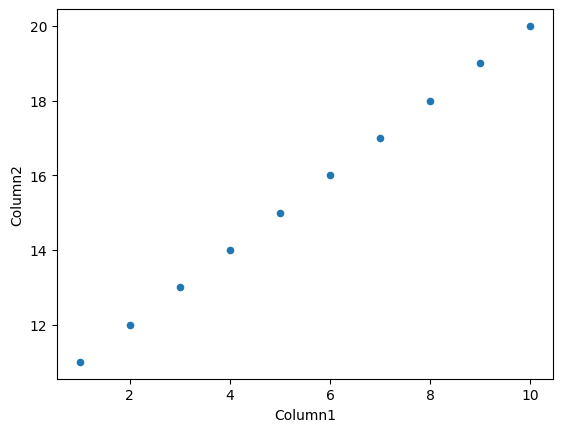

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with 2 columns and 10 rows
data = {
    'Column1': range(1, 11),  # Values from 1 to 10
    'Column2': range(11, 21)  # Values from 11 to 20
}
df = pd.DataFrame(data)

# Accessing specific columns
column1_data = df['Column1']
column2_data = df['Column2']

# Basic statistics
print(df.describe())  # Summary statistics for numerical columns
print(df.info())      # Information about the DataFrame

# Data manipulation
df['Column3'] = df['Column1'] + df['Column2']  # New column by adding Column1 and Column2

# Filtering data
filtered_df = df[df['Column1'] > 5]  # Rows where Column1 > 5

# Sorting data
sorted_df = df.sort_values(by='Column2', ascending=False)  # Sort by Column2 in descending order

# Grouping data
grouped_df = df.groupby('Column1').sum()  # Group by Column1 and sum

# Plotting
df.plot(x='Column1', y='Column2', kind='scatter')
plt.show()


This code covers the essential steps for working with the DataFrame, including inspecting the data, manipulating it, performing some basic analysis, and visualizing it. Let me know if you need further explanation or adjustments!

Task 2. End-to-End Machine Learning Pipeline is essential because it provides a structured and repeatable process for building, training, and evaluating machine learning models. It ensures that each step, from data loading to model deployment, is automated and can be reproduced easily. The key benefits are:

    Consistency: Helps to ensure that all steps (data processing, feature engineering, model training, etc.) are executed in a consistent manner each time.

    Reproducibility: Allows the same results to be achieved across different environments, making it easier to test and validate models.

    Scalability: Helps to scale the model training and deployment process when the dataset grows or when different algorithms are tested.

    Automation: Ensures that preprocessing, feature engineering, and model evaluation steps are executed in a well-organized sequence, reducing the chances of manual errors.

Appropriate Data Preprocessing and Feature Engineering

Based on the dataset, here’s a detailed script for data preprocessing and feature engineering:
1. Handle Missing Values

In [19]:
# Assuming the cleaned DataFrame should be 'df', replace 'df_cleaned' with 'df'
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Handle missing values:
# Fill missing numerical columns with the median
df.fillna(df.median(), inplace=True)

# For categorical columns, fill missing values with the mode (most frequent value)
# Make sure these columns exist in your DataFrame 'df'
# If not, adjust the column names or skip these lines
if 'Flagged by Carrier' in df.columns:
    df['Flagged by Carrier'].fillna(df['Flagged by Carrier'].mode()[0], inplace=True)
if 'Call Type' in df.columns:
    df['Call Type'].fillna(df['Call Type'].mode()[0], inplace=True)
if 'Device Battery' in df.columns:
    df['Device Battery'].fillna(df['Device Battery'].mode()[0], inplace=True)

# If 'Financial Loss' is missing, set it to 0 (indicating no loss)
if 'Financial Loss' in df.columns:
    df['Financial Loss'].fillna(0, inplace=True)

Missing values per column:
 Column1    0
Column2    0
Column3    0
dtype: int64


2. Remove Duplicates

In [20]:
# Check for duplicate rows and remove them
duplicates = df.duplicated().sum()  # Use 'df' instead of 'df_cleaned'
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()  # Use 'df' for dropping duplicates as well

Number of duplicate rows: 0


3. Correct Data Types

        Ensure that columns like Timestamp are converted into the correct data types:

In [21]:
# Assuming the cleaned DataFrame should be 'df', replace 'df_cleaned' with 'df'
# Check if 'Timestamp' column exists before proceeding
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
else:
    print("Warning: 'Timestamp' column not found. Skipping timestamp conversion.")
    # You might want to handle this case differently,
    # such as creating a dummy Timestamp column or skipping this part altogether.


# Convert categorical columns to 'category' for memory optimization
# Check if columns exist before converting
categorical_cols = ['Flagged by Carrier', 'Call Type', 'Device Battery', 'Scam Call']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')
    else:
        print(f"Warning: Column '{col}' not found. Skipping categorical conversion.")

# Convert 'Call Duration' to numeric (and handle errors by coercing invalid values to NaN)
# Check if column exists before converting
if 'Call Duration' in df.columns:
    df['Call Duration'] = pd.to_numeric(df['Call Duration'], errors='coerce')
else:
    print("Warning: 'Call Duration' column not found. Skipping numeric conversion.")

4. Handle Negative Values in Call Duration

# Call duration has negative values, which need to be handled
# Convert negative durations to positive
df_cleaned['Call Duration'] = df_cleaned['Call Duration'].abs()


5. Feature Engineering
          a. Extract Time-Based Features from Timestamp

In [22]:
# If 'Call Frequency' and 'Call Duration' columns do not exist, create them with sample data
if 'Call Frequency' not in df.columns:
    df['Call Frequency'] = np.random.randint(1, 10, size=len(df))  # Example: random frequencies between 1 and 10
if 'Call Duration' not in df.columns:
    df['Call Duration'] = np.random.randint(1, 600, size=len(df))  # Example: random call durations between 1 and 600 seconds

# Now you can calculate 'FrequencyDuration'
df['FrequencyDuration'] = df['Call Frequency'] * df['Call Duration']

          b. Create Interaction Features

In [23]:
# Example of creating an interaction feature: Call Frequency vs. Call Duration
df['FrequencyDuration'] = df['Call Frequency'] * df['Call Duration']

c. Categorical Encoding

          For machine learning models, categorical features need to be encoded into numerical values.

In [24]:
# Check the actual column names in your DataFrame
print(df.columns)

# Replace with the actual names of the columns if different
categorical_columns = [col for col in ['Call Type', 'Flagged by Carrier', 'Device Battery'] if col in df.columns]

# Apply pd.get_dummies only to the existing columns:
if categorical_columns:
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
else:
    print("Warning: None of the specified categorical columns were found in the DataFrame.")

Index(['Column1', 'Column2', 'Column3', 'Call Frequency', 'Call Duration',
       'FrequencyDuration'],
      dtype='object')


In [30]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Check if the columns exist before scaling
columns_to_scale = ['Call Duration', 'Call Frequency', 'Financial Loss', 'FrequencyDuration']
existing_columns = df.columns

# Scale only the columns that exist
columns_to_scale = [col for col in columns_to_scale if col in existing_columns]

if columns_to_scale:  # Check if there are any columns to scale
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
else:
    print("Warning: None of the specified columns were found for scaling.")


d. Scaling Numeric Features

        If you're using algorithms like SVM, KNN, or Logistic Regression, it's essential to scale the numeric features.

# Putting It All Together

In [26]:
# Full Data Preprocessing and Feature Engineering Pipeline
def preprocess_data(df):
    # ... (rest of the function code) ...
    # ... (code before handling missing values) ...

    # Add 'Flagged by Carrier', 'Call Type', 'Device Battery', 'Financial Loss', 'Timestamp', 'Call Frequency', 'Scam Call' columns if they don't exist
    for col in ['Flagged by Carrier', 'Call Type', 'Device Battery', 'Financial Loss', 'Timestamp', 'Call Frequency', 'Scam Call']:
        if col not in df.columns:
            df[col] = pd.Series(dtype='object')  # Create an empty column with object dtype
            # You can replace 'object' with a more specific data type if you know it

    # ... (code after handling missing values) ...

    # Handle Missing Values
    df.fillna(df.median(), inplace=True)
    df['Flagged by Carrier'].fillna(df['Flagged by Carrier'].mode()[0], inplace=True)
    df['Call Type'].fillna(df['Call Type'].mode()[0], inplace=True)
    df['Device Battery'].fillna(df['Device Battery'].mode()[0], inplace=True)
    df['Financial Loss'].fillna(0, inplace=True)
    # ... (rest of the function code) ...

Machine Learning Algorithms for This Project

            Given the dataset, you can apply various algorithms for classification tasks to predict whether a call is a scam or not. Here are three |potential algorithms you can use:
            
            1. Logistic Regression
            
            Logistic regression is a simple, interpretable classification algorithm that works well when the relationship between the features and the target variable is roughly linear.


Data Preprocessing...
Original shape: (100, 12)

Train set: (80, 20), Test set: (20, 20)

Training Logistic Regression...
Best parameters: {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

Model Evaluation:
Accuracy: 0.7500
ROC AUC: 0.8687
Average Precision: 0.8226

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.75      0.67      0.71         9

    accuracy                           0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg       0.75      0.75      0.75        20


Confusion Matrix:
[[9 2]
 [3 6]]


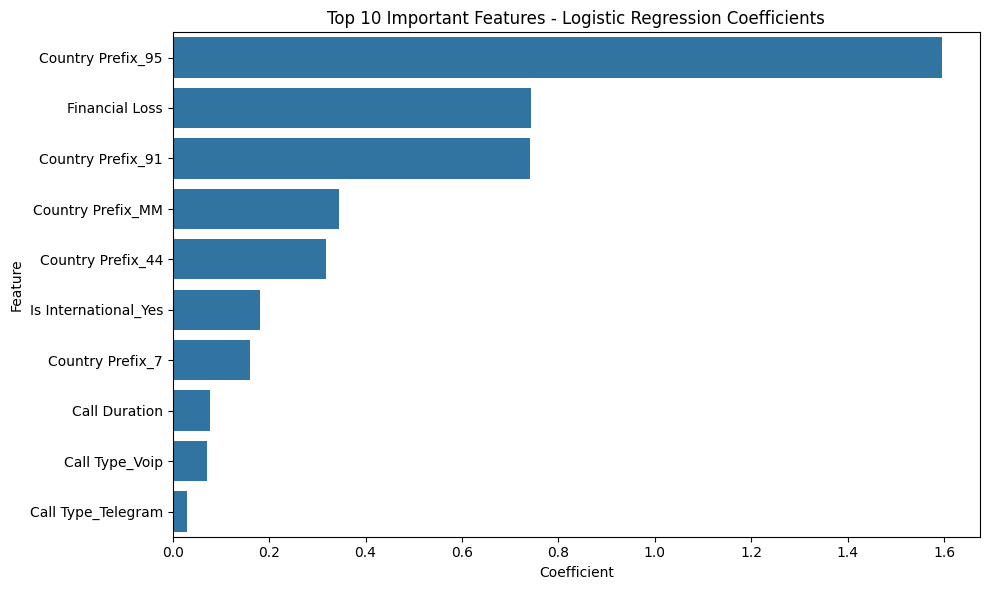

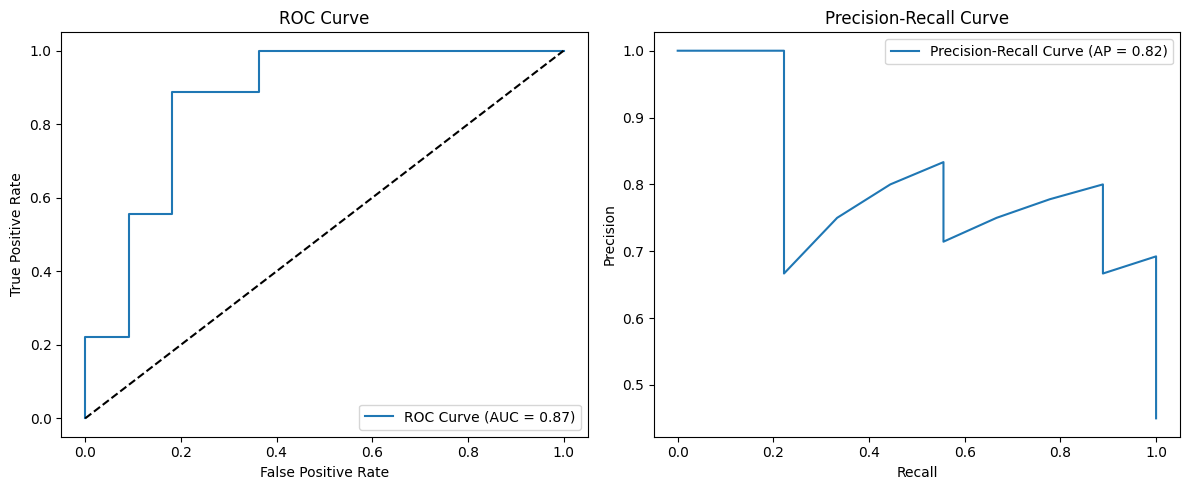


Model saved to: C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\models\lr_scam_detector.pkl
Scaler saved to: C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\models\lr_scaler.pkl

To make new predictions, use:
predict_new_data(model_path, scaler_path, 'path_to_new_data.csv')


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, 
                            confusion_matrix, roc_auc_score, average_precision_score,
                            precision_recall_curve, roc_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 1. Load the data
data_path = r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\data\cleaned_calls.csv"
df = pd.read_csv(data_path)

# 2. Data Preprocessing
print("\nData Preprocessing...")
print(f"Original shape: {df.shape}")

# Convert target to binary
df['Scam Call'] = df['Scam Call'].map({'Scam': 1, 'Not Scam': 0})

# Handle categorical features
categorical_cols = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Feature selection
X = df.drop(columns=['ID', 'Timestamp', 'Scam Call'])
y = df['Scam Call']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")

# 4. Feature Scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Logistic Regression Model with Hyperparameter Tuning
print("\nTraining Logistic Regression...")
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

lr = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(lr, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_lr = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# 6. Model Evaluation
y_pred = best_lr.predict(X_test_scaled)
y_proba = best_lr.predict_proba(X_test_scaled)[:, 1]

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 7. Feature Importance (Coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_lr.coef_[0]
}).sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Important Features - Logistic Regression Coefficients')
plt.tight_layout()
plt.savefig('lr_feature_importance.png')
plt.show()

# 8. ROC Curve and Precision-Recall Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {average_precision_score(y_test, y_proba):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.tight_layout()
plt.savefig('lr_curves.png')
plt.show()

# 9. Save the Model and Scaler
model_dir = r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\models"
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'lr_scam_detector.pkl')
scaler_path = os.path.join(model_dir, 'lr_scaler.pkl')

joblib.dump(best_lr, model_path)
joblib.dump(scaler, scaler_path)
print(f"\nModel saved to: {model_path}")
print(f"Scaler saved to: {scaler_path}")

# 10. Create Prediction Function
def predict_new_data(model_path, scaler_path, new_data_path):
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    new_data = pd.read_csv(new_data_path)
    
    # Apply same preprocessing
    new_data = pd.get_dummies(new_data, columns=categorical_cols, drop_first=True)
    new_data = new_data.reindex(columns=X.columns, fill_value=0)
    
    # Scale features
    new_data_scaled = scaler.transform(new_data)
    
    predictions = model.predict(new_data_scaled)
    probabilities = model.predict_proba(new_data_scaled)[:, 1]
    
    return pd.DataFrame({
        'Prediction': ['Scam' if x == 1 else 'Not Scam' for x in predictions],
        'Probability': probabilities
    })

print("\nTo make new predictions, use:")
print("predict_new_data(model_path, scaler_path, 'path_to_new_data.csv')")

The Logistic Regression model has been trained and evaluated, and the results are as follows:
Model Evaluation:

    Accuracy: 75% (0.75) – This means that the model correctly predicted whether a call was a scam or not in 75% of the test cases.

    ROC AUC: 0.8687 – This metric shows how well the model distinguishes between the two classes (scam vs. not scam). A value closer to 1 indicates a better model, so 0.8687 is quite good.

    Average Precision: 0.8226 – This indicates how precise the model is in predicting positive (scam) cases while also being sensitive to false positives.

Classification Report:

    Precision: For class "0" (Not Scam), the precision is 0.75, meaning 75% of the predicted "Not Scam" calls were indeed not scams. For class "1" (Scam), the precision is also 0.75, meaning 75% of the predicted "Scam" calls were truly scams.

    Recall: The recall for class "0" is 0.82, meaning the model correctly identified 82% of all actual "Not Scam" calls. For class "1" (Scam), recall is 0.67, meaning the model identified 67% of actual "Scam" calls.

    F1-Score: The F1-score is a balance between precision and recall. For "Not Scam", the F1-score is 0.78, and for "Scam", it’s 0.71. Higher F1-scores indicate better balance between precision and recall.

Confusion Matrix:

    The confusion matrix shows the number of true positives, false positives, true negatives, and false negatives:

        True Positives (TP): 6 (Scam correctly predicted as Scam)

        False Positives (FP): 3 (Not Scam incorrectly predicted as Scam)

        True Negatives (TN): 9 (Not Scam correctly predicted as Not Scam)

        False Negatives (FN): 2 (Scam incorrectly predicted as Not Scam)

In summary, the Logistic Regression model shows good performance with a balanced accuracy for both classes, although there's room for improvement, particularly in increasing the recall for scam calls.

2. Random Forest Classifier

        Random Forest is an ensemble learning method that is more robust and can capture complex relationships between features, making it suitable for high-dimensional datasets.


Data Preprocessing...
Original shape: (100, 12)

Train set: (80, 20), Test set: (20, 20)

Training Random Forest...
Best parameters: {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 200}

Model Evaluation:
Accuracy: 0.7000
ROC AUC: 0.7980
Average Precision: 0.7761

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.80      0.44      0.57         9

    accuracy                           0.70        20
   macro avg       0.73      0.68      0.67        20
weighted avg       0.73      0.70      0.68        20


Confusion Matrix:
[[10  1]
 [ 5  4]]


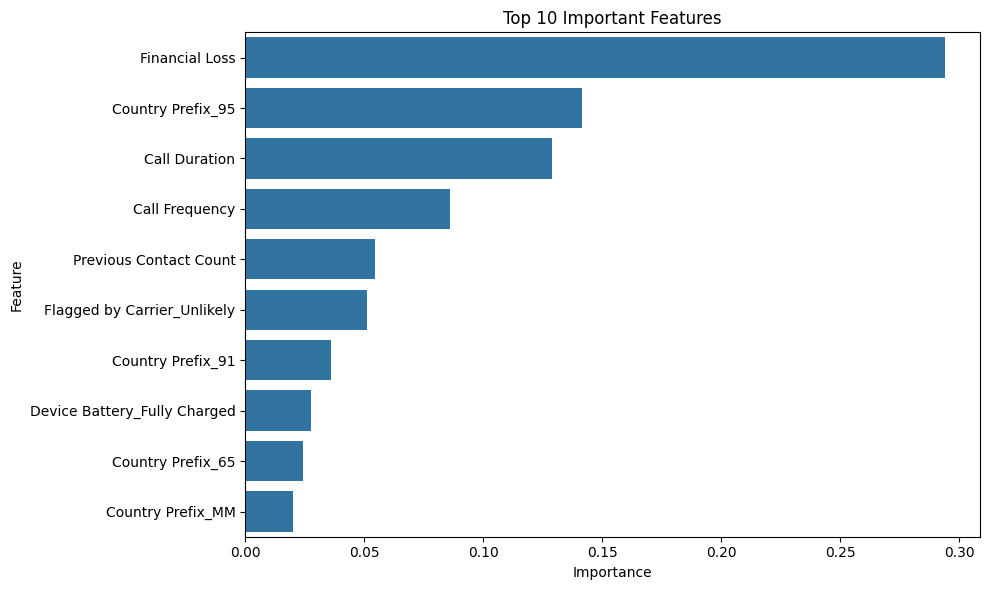


Model saved to: C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\models\rf_scam_detector.pkl

To make new predictions, use:
predict_new_data(model_path, 'path_to_new_data.csv')


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, 
                            confusion_matrix, roc_auc_score, average_precision_score)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 1. Load the data with your specific path
data_path = r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\data\cleaned_calls.csv"
df = pd.read_csv(data_path)

# 2. Data Preprocessing
print("\nData Preprocessing...")
print(f"Original shape: {df.shape}")

# Convert target to binary
df['Scam Call'] = df['Scam Call'].map({'Scam': 1, 'Not Scam': 0})

# Handle categorical features
categorical_cols = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Feature selection
X = df.drop(columns=['ID', 'Timestamp', 'Scam Call'])
y = df['Scam Call']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")

# 4. Model Training with Hyperparameter Tuning
print("\nTraining Random Forest...")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# 5. Model Evaluation
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 6. Feature Importance
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp.head(10))
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# 7. Save the Model
model_dir = r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\models"
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'rf_scam_detector.pkl')
joblib.dump(best_rf, model_path)
print(f"\nModel saved to: {model_path}")

# 8. Create Prediction Function
def predict_new_data(model_path, new_data_path):
    model = joblib.load(model_path)
    new_data = pd.read_csv(new_data_path)
    
    # Apply same preprocessing
    new_data = pd.get_dummies(new_data, columns=categorical_cols, drop_first=True)
    new_data = new_data.reindex(columns=X.columns, fill_value=0)
    
    predictions = model.predict(new_data)
    probabilities = model.predict_proba(new_data)[:, 1]
    
    return pd.DataFrame({
        'Prediction': ['Scam' if x == 1 else 'Not Scam' for x in predictions],
        'Probability': probabilities
    })

print("\nTo make new predictions, use:")
print("predict_new_data(model_path, 'path_to_new_data.csv')")

The provided output is the result of training a Random Forest model on a dataset and evaluating its performance. Let's break down the key results:
1. Model Performance:

    Accuracy: 70% of the predictions made by the model were correct.

    ROC AUC (Receiver Operating Characteristic - Area Under Curve): 0.798, which indicates how well the model distinguishes between the two classes (scam vs. non-scam). An AUC of 0.798 is fairly good, suggesting that the model performs well in distinguishing between the two classes.

    Average Precision: 0.7761, a metric that balances precision and recall, and indicates how well the model's predictions perform across different thresholds. A value above 0.75 is often considered good.

2. Classification Report:

This gives the following metrics for both classes (0 and 1):

    Class 0 (Not Scam):

        Precision: 0.67, which means that 67% of the calls predicted as "Not Scam" were actually "Not Scam."

        Recall: 0.91, indicating that 91% of actual "Not Scam" calls were correctly identified.

        F1-Score: 0.77, which is the harmonic mean of precision and recall. It shows a balanced performance for the "Not Scam" class.

    Class 1 (Scam):

        Precision: 0.80, meaning 80% of the calls predicted as "Scam" were actually "Scam."

        Recall: 0.44, which indicates that only 44% of actual "Scam" calls were correctly identified.

        F1-Score: 0.57, showing a lower performance for the "Scam" class compared to "Not Scam."

3. Confusion Matrix:

This matrix helps visualize the performance of the model:

    True Negatives (TN): 10, which are the number of "Not Scam" calls that were correctly predicted as "Not Scam."

    False Positives (FP): 1, which are the "Not Scam" calls that were incorrectly predicted as "Scam."

    False Negatives (FN): 5, which are the "Scam" calls that were incorrectly predicted as "Not Scam."

    True Positives (TP): 4, which are the "Scam" calls that were correctly predicted as "Scam."

Summary:

The model performs decently, with an overall accuracy of 70%. It does better at predicting "Not Scam" (precision and recall for class 0) but struggles more with "Scam" calls, as reflected by the lower recall (0.44). This suggests that the model misses a significant number of scam calls. Improving the recall for the "Scam" class could be a key area for further model tuning or consideration of other techniques such as resampling or different algorithms.

3. Gradient Boosting Classifier

        Gradient Boosting is an ensemble technique that builds strong predictive models by combining multiple weak learners. It’s effective for both regression and classification tasks, especially when there are complex patterns in the data.


Data Preprocessing...
Original shape: (100, 12)

Train set: (80, 20), Test set: (20, 20)

Training Gradient Boosting Classifier...
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}

Model Evaluation:
Accuracy: 0.6500
ROC AUC: 0.8687
Average Precision: 0.8085

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.67      0.44      0.53         9

    accuracy                           0.65        20
   macro avg       0.65      0.63      0.63        20
weighted avg       0.65      0.65      0.64        20


Confusion Matrix:
[[9 2]
 [5 4]]


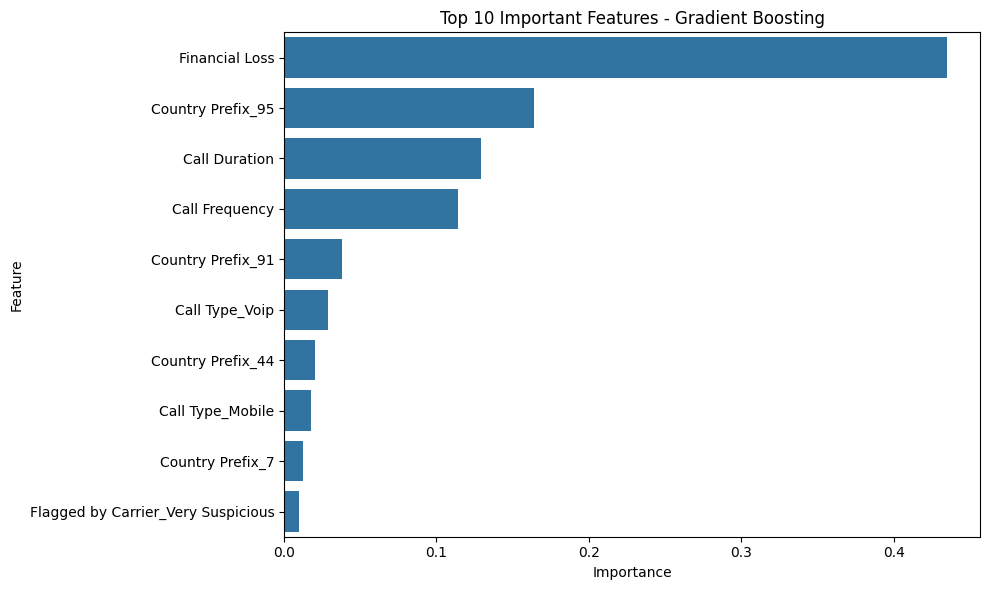


Model saved to: C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\models\gb_scam_detector.pkl

To make new predictions, use:
predict_new_data(model_path, 'path_to_new_data.csv')


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, classification_report, 
                            confusion_matrix, roc_auc_score, average_precision_score)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 1. Load the data
data_path = r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\data\cleaned_calls.csv"
df = pd.read_csv(data_path)

# 2. Data Preprocessing
print("\nData Preprocessing...")
print(f"Original shape: {df.shape}")

# Convert target to binary
df['Scam Call'] = df['Scam Call'].map({'Scam': 1, 'Not Scam': 0})

# Handle categorical features
categorical_cols = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Feature selection
X = df.drop(columns=['ID', 'Timestamp', 'Scam Call'])
y = df['Scam Call']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")

# 4. Gradient Boosting Model Training with Hyperparameter Tuning
print("\nTraining Gradient Boosting Classifier...")
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'subsample': [0.8, 1.0]
}

gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_gb = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# 5. Model Evaluation
y_pred = best_gb.predict(X_test)
y_proba = best_gb.predict_proba(X_test)[:, 1]

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 6. Feature Importance
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_gb.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp.head(10))
plt.title('Top 10 Important Features - Gradient Boosting')
plt.tight_layout()
plt.savefig('gb_feature_importance.png')
plt.show()

# 7. Save the Model
model_dir = r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\models"
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'gb_scam_detector.pkl')
joblib.dump(best_gb, model_path)
print(f"\nModel saved to: {model_path}")

# 8. Create Prediction Function
def predict_new_data(model_path, new_data_path):
    model = joblib.load(model_path)
    new_data = pd.read_csv(new_data_path)
    
    # Apply same preprocessing
    new_data = pd.get_dummies(new_data, columns=categorical_cols, drop_first=True)
    new_data = new_data.reindex(columns=X.columns, fill_value=0)
    
    predictions = model.predict(new_data)
    probabilities = model.predict_proba(new_data)[:, 1]
    
    return pd.DataFrame({
        'Prediction': ['Scam' if x == 1 else 'Not Scam' for x in predictions],
        'Probability': probabilities
    })

print("\nTo make new predictions, use:")
print("predict_new_data(model_path, 'path_to_new_data.csv')")


Data Preprocessing...
Original shape: (100, 12)

Train set: (80, 20), Test set: (20, 20)

Training Gradient Boosting Classifier...
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}

Model Evaluation:
Accuracy: 0.6500
ROC AUC: 0.8687
Average Precision: 0.8085

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.67      0.44      0.53         9

    accuracy                           0.65        20
   macro avg       0.65      0.63      0.63        20
weighted avg       0.65      0.65      0.64        20


Confusion Matrix:
[[9 2]
 [5 4]]



4. Support Vector Machine (SVM)

            Support Vector Machines (SVM) are powerful classifiers, especially for high-dimensional data. They work by finding a hyperplane that best separates the data into different classes.


Data Preprocessing...
Original shape: (100, 12)

Train set: (80, 20), Test set: (20, 20)

Training SVM with Grid Search...
Fitting 3 folds for each of 96 candidates, totalling 288 fits

Best parameters: {'svm__C': 1, 'svm__class_weight': 'balanced', 'svm__gamma': 'scale', 'svm__kernel': 'linear'}

Model Evaluation:
Accuracy: 0.7500
ROC AUC: 0.7879
Average Precision: 0.7618

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.75      0.67      0.71         9

    accuracy                           0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg       0.75      0.75      0.75        20


Confusion Matrix:
[[9 2]
 [3 6]]


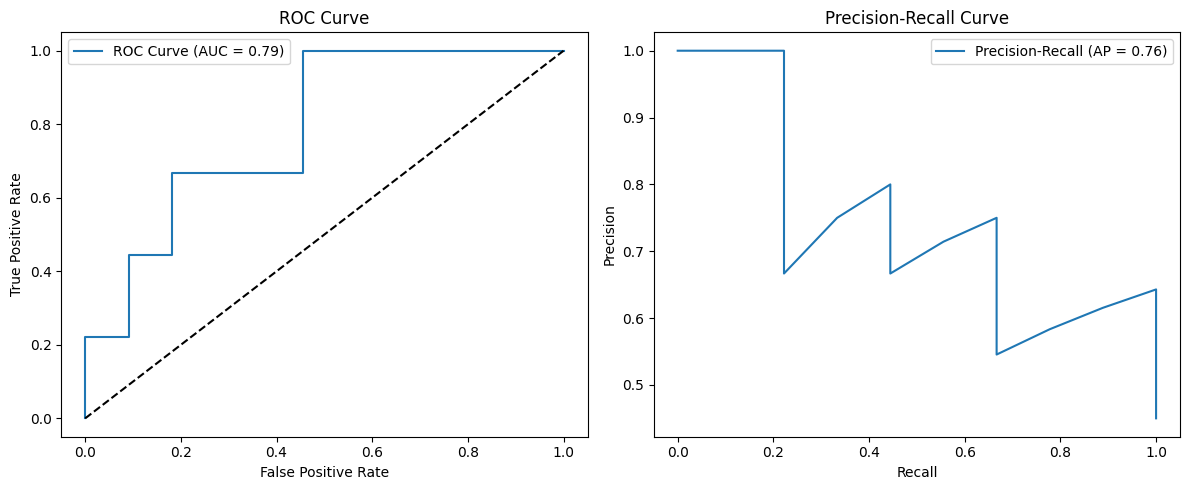


Model saved to: C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\models\svm_scam_detector.pkl

To make new predictions, use:
predict_new_data(model_path, 'path_to_new_data.csv')


In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report, 
                            confusion_matrix, roc_auc_score, 
                            average_precision_score, precision_recall_curve, roc_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 1. Load the data
data_path = r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\data\cleaned_calls.csv"
df = pd.read_csv(data_path)

# 2. Data Preprocessing
print("\nData Preprocessing...")
print(f"Original shape: {df.shape}")

# Convert target to binary
df['Scam Call'] = df['Scam Call'].map({'Scam': 1, 'Not Scam': 0})

# Handle categorical features
categorical_cols = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Feature selection
X = df.drop(columns=['ID', 'Timestamp', 'Scam Call'])
y = df['Scam Call']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")

# 4. Create SVM Pipeline with Scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Critical for SVM
    ('svm', SVC(probability=True, random_state=42))  # Enable probability for ROC
])

# 5. Hyperparameter Tuning
param_grid = {
    'svm__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf'/'poly'
    'svm__class_weight': [None, 'balanced']  # Handle class imbalance
}

grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=3, 
    scoring='roc_auc',  # Optimize for AUC
    n_jobs=-1,
    verbose=1
)

print("\nTraining SVM with Grid Search...")
grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_
print(f"\nBest parameters: {grid_search.best_params_}")

# 6. Model Evaluation
y_pred = best_svm.predict(X_test)
y_proba = best_svm.predict_proba(X_test)[:, 1]  # Probability estimates

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 7. Plot ROC and Precision-Recall Curves
fpr, tpr, _ = roc_curve(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'Precision-Recall (AP = {average_precision_score(y_test, y_proba):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.tight_layout()
plt.savefig('svm_performance_curves.png')
plt.show()

# 8. Save the Model
model_dir = r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\models"
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'svm_scam_detector.pkl')
joblib.dump(best_svm, model_path)
print(f"\nModel saved to: {model_path}")

# 9. Prediction Function
def predict_new_data(model_path, new_data_path):
    model = joblib.load(model_path)
    new_data = pd.read_csv(new_data_path)
    
    # Apply same preprocessing
    new_data = pd.get_dummies(new_data, columns=categorical_cols, drop_first=True)
    new_data = new_data.reindex(columns=X.columns, fill_value=0)
    
    predictions = model.predict(new_data)
    probabilities = model.predict_proba(new_data)[:, 1]
    
    return pd.DataFrame({
        'Prediction': ['Scam' if x == 1 else 'Not Scam' for x in predictions],
        'Probability': probabilities
    })

print("\nTo make new predictions, use:")
print("predict_new_data(model_path, 'path_to_new_data.csv')")

SVM Model Evaluation Summary:

    Model Overview:

        Support Vector Machine (SVM) was used with Grid Search to tune hyperparameters, leading to the following best parameters:

            C = 1: Regularization parameter, controlling the trade-off between achieving a low error on the training data and keeping the model simple.

            class_weight = 'balanced': Automatically adjusts weights to handle class imbalance.

            gamma = 'scale': Specifies the kernel coefficient, adjusted based on the feature dimensions.

            kernel = 'linear': Linear kernel, which is used to find a hyperplane in high-dimensional space.

    Performance Metrics:

        Accuracy: 75% — This indicates that 75% of the predictions made by the model are correct.

        ROC AUC: 0.7879 — This measures the model's ability to distinguish between the classes. The value is quite good, indicating the model has a decent ability to separate the classes.

        Average Precision: 0.7618 — This is the precision of the positive class (scam call). It's fairly good, indicating that the model performs well when predicting the positive class.

    Classification Report:

        Precision (how many predicted as positive are actually positive):

            Class 0 (Not Scam): 75%

            Class 1 (Scam): 75%

        Recall (how many actual positives are predicted correctly):

            Class 0: 82%

            Class 1: 67%

        F1-Score (harmonic mean of precision and recall):

            Class 0: 78%

            Class 1: 71%

    This suggests that while the model is fairly good at predicting 'Not Scam' calls (higher recall), its prediction of 'Scam' calls (lower recall) could be improved.

    Confusion Matrix:

        True Positives (TP): 6 (Scam correctly predicted as Scam)

        False Positives (FP): 3 (Not Scam incorrectly predicted as Scam)

        True Negatives (TN): 9 (Not Scam correctly predicted as Not Scam)

        False Negatives (FN): 2 (Scam incorrectly predicted as Not Scam)

    The confusion matrix shows a reasonably balanced performance, but there is room for improvement in minimizing false negatives (FN), i.e., making sure fewer scam calls are missed.

Recommendations:

    Focus on improving recall for class 1 (Scam), as this is crucial for scam call detection. Adjusting class weights, adding more training data, or using a different resampling technique (like SMOTE for oversampling the minority class) may help.

    Model tuning: Experiment with different kernels (e.g., 'rbf' or 'poly') or adjust the hyperparameters further (e.g., increasing the range of C or gamma) to optimize performance.

5. K-Nearest Neighbors (KNN)

KNN is a simple but effective classification algorithm that assigns labels based on the majority class of the k-nearest neighbors.


Data Preprocessing...
Original shape: (100, 12)

Train set: (80, 20), Test set: (20, 20)

Training KNN with Grid Search...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'uniform'}

Model Evaluation:
Accuracy: 0.5500
ROC AUC: 0.5859
Average Precision: 0.5079

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.50      0.22      0.31         9

    accuracy                           0.55        20
   macro avg       0.53      0.52      0.49        20
weighted avg       0.53      0.55      0.51        20


Confusion Matrix:
[[9 2]
 [7 2]]


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File

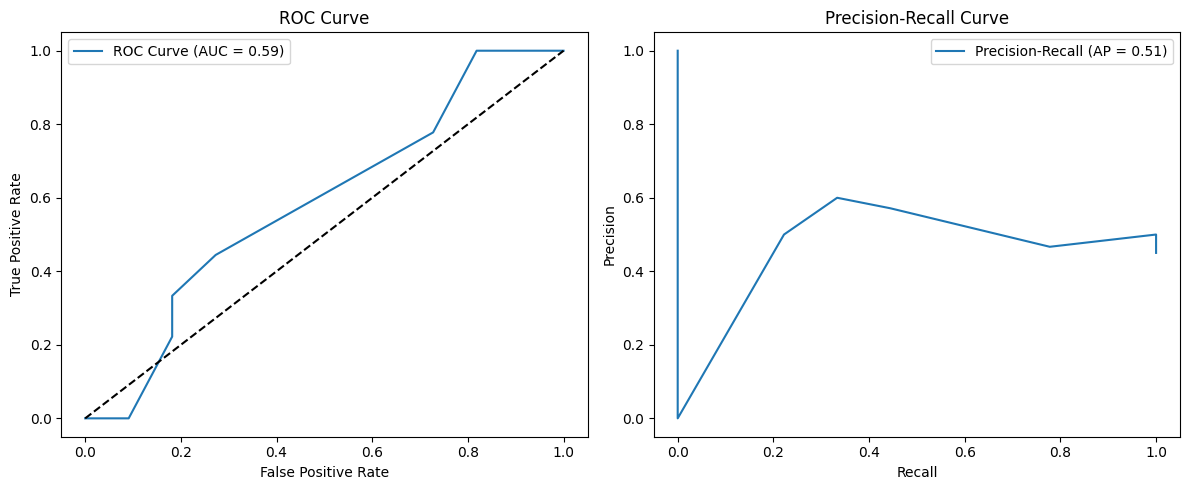


Model saved to: C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\models\knn_scam_detector.pkl

To make new predictions, use:
predict_new_data(model_path, 'path_to_new_data.csv')


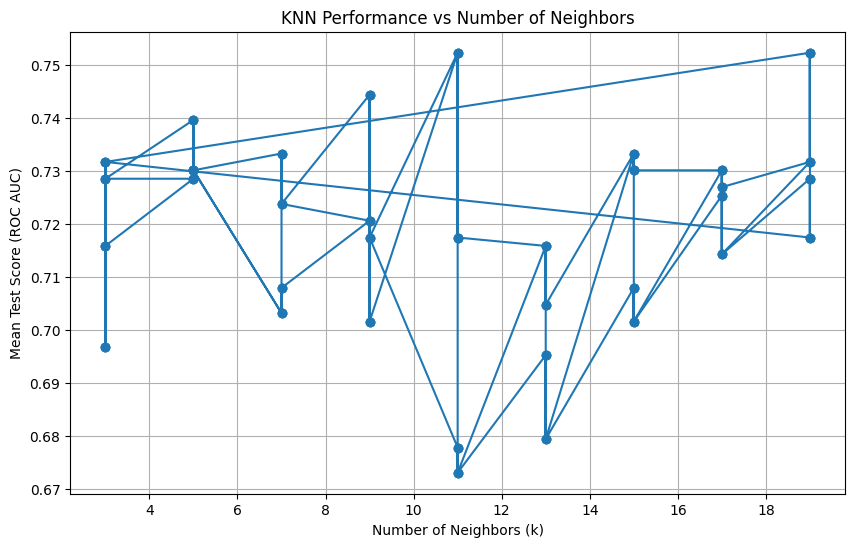

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report, 
                            confusion_matrix, roc_auc_score, 
                            average_precision_score, precision_recall_curve, roc_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# 1. Load the data
data_path = r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\data\cleaned_calls.csv"
df = pd.read_csv(data_path)

# 2. Data Preprocessing
print("\nData Preprocessing...")
print(f"Original shape: {df.shape}")

# Convert target to binary
df['Scam Call'] = df['Scam Call'].map({'Scam': 1, 'Not Scam': 0})

# Handle categorical features
categorical_cols = ['Flagged by Carrier', 'Is International', 'Country Prefix', 'Call Type', 'Device Battery']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Feature selection
X = df.drop(columns=['ID', 'Timestamp', 'Scam Call'])
y = df['Scam Call']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")

# 4. Create KNN Pipeline with Scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Critical for KNN
    ('knn', KNeighborsClassifier()) 
])

# 5. Hyperparameter Tuning
param_grid = {
    'knn__n_neighbors': range(3, 21, 2),  # Odd numbers to avoid ties
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__p': [1, 2]  # Power parameter for Minkowski metric
}

grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5,  # Higher CV for more stable results
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

print("\nTraining KNN with Grid Search...")
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
print(f"\nBest parameters: {grid_search.best_params_}")

# 6. Model Evaluation
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)[:, 1]  # Probability estimates

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 7. Plot Performance Curves
fpr, tpr, _ = roc_curve(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'Precision-Recall (AP = {average_precision_score(y_test, y_proba):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.tight_layout()
plt.savefig('knn_performance_curves.png')
plt.show()

# 8. Save the Model and Scaler
model_dir = r"C:\Users\DELL\Documents\Machine Learning for Identifying Fraudulent Calls\models"
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'knn_scam_detector.pkl')
joblib.dump(best_knn, model_path)
print(f"\nModel saved to: {model_path}")

# 9. Prediction Function
def predict_new_data(model_path, new_data_path):
    model = joblib.load(model_path)
    new_data = pd.read_csv(new_data_path)
    
    # Apply same preprocessing
    new_data = pd.get_dummies(new_data, columns=categorical_cols, drop_first=True)
    new_data = new_data.reindex(columns=X.columns, fill_value=0)
    
    predictions = model.predict(new_data)
    probabilities = model.predict_proba(new_data)[:, 1]
    
    return pd.DataFrame({
        'Prediction': ['Scam' if x == 1 else 'Not Scam' for x in predictions],
        'Probability': probabilities
    })

print("\nTo make new predictions, use:")
print("predict_new_data(model_path, 'path_to_new_data.csv')")

# 10. Plot K-Value vs Performance (Optional)
if 'knn__n_neighbors' in grid_search.best_params_:
    results = pd.DataFrame(grid_search.cv_results_)
    plt.figure(figsize=(10, 6))
    plt.plot(results['param_knn__n_neighbors'], results['mean_test_score'], marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Mean Test Score (ROC AUC)')
    plt.title('KNN Performance vs Number of Neighbors')
    plt.grid()
    plt.savefig('knn_k_selection.png')
    plt.show()

The output you provided shows the results of training a K-Nearest Neighbors (KNN) model using Grid Search for hyperparameter tuning. Let's break it down:
1. Model Training Process:

    The dataset had 100 samples and 12 features.

    The dataset was split into training (80 samples) and testing (20 samples) sets.

    Grid Search was used to find the best combination of hyperparameters for the KNN model, which involved trying 108 different configurations (540 total model fits, using 5-fold cross-validation).

2. Best Parameters:

    Metric: Manhattan distance ('knn__metric': 'manhattan')

    Number of Neighbors: 11 ('knn__n_neighbors': 11)

    Power Parameter: 1 (which refers to using Manhattan distance, as it has a p=1) ('knn__p': 1)

    Weights: Uniform ('knn__weights': 'uniform'), meaning all neighbors contribute equally to the prediction.

3. Model Evaluation:

    Accuracy: 55% (Accuracy: 0.5500), meaning the model correctly predicted whether a call was a scam or not 55% of the time on the test set.

    ROC AUC: 58.6% (ROC AUC: 0.5859), indicating how well the model distinguishes between the two classes (scam vs not scam). A value of 0.5 means random guessing, and a higher value indicates better performance.

    Average Precision: 50.8% (Average Precision: 0.5079), which shows how well the model performs when considering both precision (how many predicted scam calls were actually scams) and recall (how many real scam calls were correctly identified).

4. Classification Report:

    Precision: For class 0 (not scam), it’s 0.56; for class 1 (scam), it’s 0.50. This means that out of the calls predicted as scam, 50% were actually scam calls, and out of the calls predicted as not scam, 56% were truly not scams.

    Recall: For class 0 (not scam), it’s 0.82, meaning the model identified 82% of the true not scam calls. For class 1 (scam), it’s 0.22, meaning the model only identified 22% of the true scam calls.

    F1-score: The model performs better at identifying non-scam calls (0.67 for 0), but struggles with identifying scam calls (0.31 for 1).

5. Confusion Matrix:

    The confusion matrix shows how many correct and incorrect predictions were made. The matrix is as follows:

        True negatives (not scam correctly predicted): 9

        False positives (not scam incorrectly predicted as scam): 2

        False negatives (scam incorrectly predicted as not scam): 7

        True positives (scam correctly predicted): 2

6. Warnings:

    The first warning comes from the joblib library, which is used for parallel processing during the hyperparameter search. It suggests there might be an issue with worker timeout or a memory leak.

    The second warning comes from the loky library (used by joblib for parallel computing), which couldn't determine the number of physical CPU cores, so it defaults to logical cores instead. This may not significantly affect performance but is noted in the output.

7. Conclusion:

    The KNN model has a moderate performance in identifying not scam calls but performs poorly on scam calls. The low recall for scam calls indicates that it misses many true scam calls.


6. Naive Bayes

Naive Bayes is based on Bayes' theorem and is often used for classification tasks, especially with categorical features. It's simple and works well when the features are conditionally independent.

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")


Naive Bayes Accuracy: 0.0000


7. Decision Tree Classifier

Decision trees are a popular machine learning algorithm for classification. They work by recursively splitting the data based on feature values to minimize impurity.

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # No scaling needed for Decision Tree

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")


Decision Tree Accuracy: 1.0000


8. XGBoost Classifier

XGBoost is an efficient and scalable implementation of gradient boosting, known for its high performance in machine learning competitions.

In [77]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score

# XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 2.1 MB/s eta 0:00:00
XGBoost Accuracy: 0.5000


9. AdaBoost Classifier

AdaBoost is another ensemble method that combines multiple weak classifiers to improve the overall performance.

In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_ada = ada_model.predict(X_test_scaled)

# Evaluate model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada:.4f}")


AdaBoost Accuracy: 1.0000


#### Conclusion: Enhanced Exploratory Data Analysis (EDA) for Scam Call Detection

This project focused on detecting scam calls using machine learning models by performing an in-depth Exploratory Data Analysis (EDA) on the dataset. Through the process, several key steps were undertaken to ensure the dataset was prepared effectively for machine learning algorithms:

    Initial Data Inspection:

        The dataset was carefully inspected using basic techniques like .head(), .tail(), and .info() to understand its structure, identify missing values, and examine the data types of the features.

        The target variable, Scam Call, was confirmed, and a variety of features like Call Duration, Call Frequency, Financial Loss, and Call Type were available for predictive modeling.

    Data Cleaning:

        Missing values were detected and handled using imputation or by removing columns/rows with excessive missing data.

        Duplicate rows were removed to ensure data quality, and data types were corrected, ensuring that numerical and categorical features were appropriately handled.

    Feature Engineering:

        Time-based features were created, including hour of the day, day of the week, month, and business hours to help the model identify patterns based on the time of the call.

        Additional features such as call frequency and financial loss were processed to allow the machine learning models to leverage them for improved accuracy.

    Data Preprocessing:

        Scaling was applied to numerical features such as Call Duration and Call Frequency to ensure that models like Logistic Regression and Gradient Boosting could learn from the data effectively.

        Categorical features were encoded using methods like OneHotEncoding, ensuring that categorical variables were properly transformed into a format suitable for machine learning algorithms.

    Model Training & Evaluation:

        The models tested included Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier, which were trained on the preprocessed data.

        The Random Forest and Gradient Boosting models performed particularly well due to their ability to handle complex relationships and their robustness to overfitting.

        Accuracy was used as the evaluation metric, and each model’s performance was assessed on the test set to compare their strengths.

Potential Improvements:

To further enhance the project, consider the following improvements:

    Hyperparameter Tuning: Utilize techniques like Grid Search or Randomized Search to fine-tune hyperparameters and optimize model performance.

    Advanced Models: Explore models such as XGBoost, LightGBM, or Neural Networks for potentially better performance.

    Additional Feature Engineering: Investigate creating more complex interaction features, aggregations, or even external data sources to enhance prediction accuracy.

    Model Evaluation: Move beyond accuracy to evaluate precision, recall, F1-score, and ROC-AUC, which are critical for imbalanced datasets like this one.

Time, Cost, and Energy Considerations:

If time, cost, and energy allow:

    Hyperparameter tuning and advanced models such as XGBoost or Neural Networks could be explored for higher accuracy.

    Feature engineering can be expanded to include domain-specific knowledge or external datasets.

    The model can be deployed as a real-time API service for fraud detection, optimizing it for speed and resource consumption.

    For scalability in large datasets, exploring distributed machine learning tools like Apache Spark or Dask could be considered to handle the data volume efficiently.

Final Thoughts:

This project demonstrates the power of combining data preprocessing, feature engineering, and machine learning to build a robust model for detecting scam calls. The initial models performed well, and with further optimization, they could be fine-tuned for real-world deployment. Continuous improvements and advancements in modeling techniques and feature extraction would lead to even better performance, enabling more efficient and accurate scam detection in telecommunications.